# Data Preparation

In [ ]:
# This dataset contains following columns:

# pregnancies - number of times pregnant
# glucose - plasma glucose concentration a 2 hours in an oral glucose tolerance test
# pressure - diastolic blood pressure (mm Hg)
# skin - triceps skinfold thickness (mm)
# insulin - 2-Hour serum insulin (mu U/ml)
# bmi - Body mass index (weight in kg/(height in m)^2)
# pedigre - Diabetes pedigree function
# age - Age (years)
# class - Class variable (0 - healthy or 1 - diabetic)


In [ ]:
#@title Data load from GitHub
# Load a csv file from GitHub by coping a raw csv link
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
headernames = ['pregnancies', 'glucose', 'pressure', 'skin', 'insulin', 'bmi', 'pedigre', 'age', 'class']
df = pd.read_csv(url, names=headernames)
df.shape

(768, 9)

In [ ]:
#@title Checking data
# First 5 rows
df.head()

,pregnancies,glucose,pressure,skin,insulin,bmi,pedigre,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    float64
 2   pressure     768 non-null    float64
 3   skin         768 non-null    float64
 4   insulin      768 non-null    float64
 5   bmi          768 non-null    float64
 6   pedigre      768 non-null    float64
 7   age          768 non-null    int64  
 8   class        768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
df.describe()

,pregnancies,glucose,pressure,skin,insulin,bmi,pedigre,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Checking balance
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [ ]:
# Checking null values
df.isnull().any()

pregnancies    False
glucose        False
pressure       False
skin           False
insulin        False
bmi            False
pedigre        False
age            False
class          False
dtype: bool

In [ ]:
#@title Data Cleaning

# Changing 0 values with NaN
df[['glucose', 'pressure', 'skin', 'insulin', 'bmi']] = df[['glucose', 'pressure', 'skin', 'insulin', 'bmi']].replace(0, np.NaN)
df.isnull().sum()

pregnancies      0
glucose          5
pressure        35
skin           227
insulin        374
bmi             11
pedigre          0
age              0
class            0
dtype: int64

In [ ]:
# Imputation for completing missing values using k-Nearest Neighbors.
from sklearn.impute import KNNImputer

# Each sample’s missing values are imputed using the mean value from n_neighbors
# nearest neighbors found in the training set. 

# By default, a euclidean distance metric that supports missing values, nan_euclidean_distances,
# is used to find the nearest neighbors. Each missing feature is imputed using values from
# n_neighbors nearest neighbors that have a value for the feature.
# https://scikit-learn.org/stable/modules/impute.html#knnimpute

# n_neighbors int, default=5
# missing_values int, float, str, np.nan or None, default=np.nan
  ## The placeholder for the missing values. All occurrences of missing_values will
  ## be imputed. For pandas’ dataframes with nullable integer dtypes with missing values,
  ## missing_values should be set to np.nan, since pd.NA will be converted to np.nan.
# keep_empty_features bool, default=False
  ## If True, features that consist exclusively of missing values when fit is called
  ## are returned in results when transform is called. The imputed value is always 0.
imputer1 = KNNImputer(n_neighbors=5)
df[['glucose', 'pressure', 'skin', 'insulin', 'bmi']] = pd.DataFrame(imputer1.fit_transform(df[['glucose', 'pressure', 'skin', 'insulin', 'bmi']]),
                                                                     columns = ['glucose', 'pressure', 'skin', 'insulin', 'bmi'])

# KNNImputer can be also used for missing categorical variables. In this case, only the nearest neighbour
# ise selected as replacement (n_neighbors=1). If you use more than one neighbour it will render some meaningless average).

# For imputing missing categorical variables by using scikit-learn, you can use sklearn.impute.SimpleImputer
# using strategy="most_frequent": this will replace missing values using the most frequent value along each column,
# no matter if they are strings or numeric data.

# When variables in a dataframe require different imputation strategies, a dataframe has to be divided
# (e.g., subset with categorical variables with missing values and subset with numerical variables with missing values)
# before the imputation.

# Check data type after the imputation, because some imputers can change the variable type.

In [ ]:
# Describing data
df.isnull().sum()

pregnancies    0
glucose        0
pressure       0
skin           0
insulin        0
bmi            0
pedigre        0
age            0
class          0
dtype: int64

In [ ]:
#@title Checking normality
# If numeric variables follow normal distribution can be checked for instance using visual inspection
# or a normality test such as shapiro test (good for small sample sizes, e.g. n < ~2000)

from scipy.stats import shapiro

# Columns without the class/output
columns =  df.columns[:-1]

# Checking if numeric variables follow normal distribution
for i in columns:    
    print(i)
    # normality test
    stat, p = shapiro(df[i])
    print('\n(W)= %e,\n p = %e' % ( stat, p ))     

    if p > 0.05:        
        print('\nSample looks Gaussian\n')
    else:        
        print('\nSample does not look Gaussian\n')

pregnancies

(W)= 9.042832e-01,
 p = 1.610010e-21

Sample does not look Gaussian

glucose

(W)= 9.703515e-01,
 p = 2.278679e-11

Sample does not look Gaussian

pressure

(W)= 9.898014e-01,
 p = 3.580780e-05

Sample does not look Gaussian

skin

(W)= 9.709961e-01,
 p = 3.269282e-11

Sample does not look Gaussian

insulin

(W)= 8.314843e-01,
 p = 1.102943e-27

Sample does not look Gaussian

bmi

(W)= 9.795641e-01,
 p = 7.004946e-09

Sample does not look Gaussian

pedigre

(W)= 8.365189e-01,
 p = 2.477799e-27

Sample does not look Gaussian

age

(W)= 8.747659e-01,
 p = 2.401830e-24

Sample does not look Gaussian



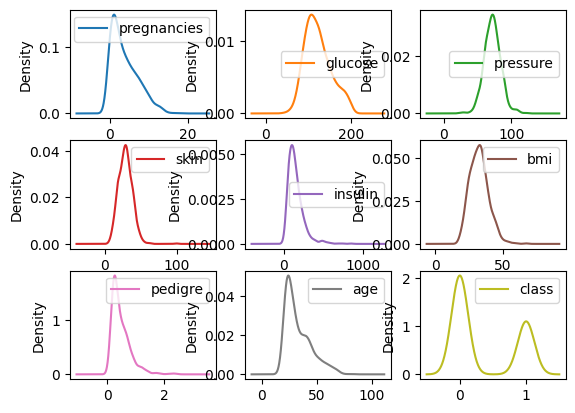

In [ ]:
# Univariate Plots (Density Plots)
from matplotlib import pyplot

df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

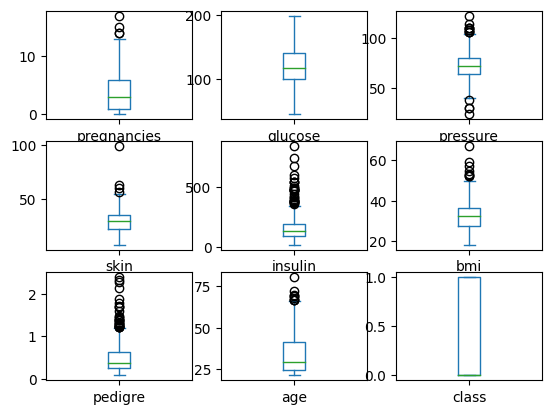

In [ ]:
# Exploring outliers
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

In [ ]:
# Visualizing outliers
# Outliers 
  # Outlier is a data point that differs significantly from other observations
  # Outlier may be due to variability in the measurement or it may indicate experimental error
  # Outliers are sometimes excluded from the data set
sns.pairplot(data = df, hue="class", palette="hls");

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title Splitting data
from sklearn.model_selection import train_test_split

# Spliting x axis and y axis
y = df['class']
x = df.drop(['class'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

x_test.shape,y_test.shape

((231, 8), (231,))

In [ ]:
# Addressing class imbalance

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
print(f"Testing target statistics: {Counter(y_train)}")

Testing target statistics: Counter({1: 343, 0: 343})


In [ ]:
#@title Data Rescaling
from sklearn.preprocessing import RobustScaler

# When	variables	are	in	incomparable	units	and/or	the	numeric	values	are	on	very different	
# scales	of	magnitude,	they	should	be	rescaled.

# (1) Normalization	can be used when there are no outliers.
# Normalization - reducing variable values to a common value range, typically [0,1]; this is often done using the formula:
# Z = (X - min(X))/(max(X) - min(X))
# sklearn.preprocessing.normalize

# (2) Standardization - rescaling variables so that their mean = 0 and SD = 1. For the variable X that is
# normally distributed, this is done by computing:
# Z = (X - mean(X))/SD(X)
# sklearn.preprocessing.StandardScaler

# Normalization is a special case of min-max scaling (sklearn.preprocessing MinMaxScaler). 
# Normalization should be avoided if (numerical) variables have outliers. 
# Standardization is somewhat less affected by the presence of outliers. However, the outliers
# have an influence when computing the empirical mean and standard deviation. 
# In the absence of outliers, either of the two can be used.

# Standardization can be helpful in cases where data follow a Gaussian distribution.
# However, this doesn’t necessarily have to be true. In addition, unlike normalization, standardization doesn’t have a bounding range.

# (3) If the variable X is not normally distributed, standardization is typically done using median and interquartile range (IQR)
# Z = (X - meadian(X))/IQR(X)
# where IQR(X) = Q3(X) − Q1(X)
# sklearn.preprocessing.RobustScaler

# (4) Log scaling computes the log of the values to compress a wide range to a narrow range.
# In other words, it helps convert a skewed distribution to a normal distribution/less-skewed distribution. 

# Data rescaling
scaler = RobustScaler()

# Columns without the class/output
scaler = RobustScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)


In [ ]:
x_train.describe()

,pregnancies,glucose,pressure,skin,insulin,bmi,pedigre,age
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.202624,0.085811,-0.013477,0.050527,0.228787,0.062139,0.271015,0.209091
std,0.692183,0.695538,0.756484,0.764065,0.961128,0.797392,0.902775,0.674357
min,-0.600000,-1.488889,-2.767296,-1.692308,-1.147222,-1.656338,-0.757244,-0.563380
25%,-0.400000,-0.466667,-0.503145,-0.461538,-0.401852,-0.473239,-0.352865,-0.338028
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.533333,0.496855,0.538462,0.598148,0.526761,0.647135,0.661972
max,2.800000,1.666667,3.018868,5.384615,6.556481,3.853521,5.259498,2.816901


# KNN

In [ ]:
#@title KNN 1 - random K
from sklearn.neighbors import KNeighborsClassifier

# Initializing KNN with K=10
knn1 = KNeighborsClassifier(n_neighbors=10)

# Fitting the model
knn1 = knn1.fit(x_train,y_train)

In [ ]:
#@title KNN 1 Evaluation
from sklearn.metrics import classification_report

# Predicting a class / outcome using test data
y_pred1 = knn1.predict(x_test)

# Printing classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       157
           1       0.57      0.66      0.61        74

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.73      0.74       231



In [ ]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix
confusion_matrix(y_test, y_pred1)

array([[120,  37],
       [ 25,  49]])

In [ ]:
from sklearn import metrics
# Compute evaluation metrics:
# accuracy = (TP + TN) / N
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# F1 = (2 * precision * recall) / (precision + recall)
# Note: precision and recall are inversely proportional to each other.

# Accuracy
knn1_accuracy = metrics.accuracy_score(y_test, y_pred1)

# Precision
knn1_precision = metrics.precision_score(y_test, y_pred1)

# Recall
knn1_recall = metrics.recall_score(y_test, y_pred1)

# F1
knn1_f1 = metrics.f1_score(y_test, y_pred1)

print("\nAccuracy: ", knn1_accuracy,
      "\nPrecision: ", knn1_precision,
      "\nRecall: ", knn1_recall,
      "\nF1: ", knn1_f1)


Accuracy:  0.7316017316017316 
Precision:  0.5697674418604651 
Recall:  0.6621621621621622 
F1:  0.6125


In [ ]:
#@title KNN 2 - AUC Hyperparameter tuning
import sklearn
from sklearn.neighbors import KNeighborsClassifier


tt = {}
il = []
auc=[]

# Looking for the best K value by getting ROC_AUC for each K ranging from 1 to 100
for  i in range(1,100):  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  il.append(i)
  auc.append(sklearn.metrics.roc_auc_score(y_test,y_pred))
  tt.update({'K':il})
  tt.update({'ROC_AUC':auc})
 
  vv = pd.DataFrame(tt)

vv_sorted = vv.sort_values('ROC_AUC',ascending=False,ignore_index=True)

vv_sorted.head(10)

,K,ROC_AUC
0,45,0.763729
1,34,0.763729
2,36,0.763341
3,44,0.762954
4,59,0.760157
5,42,0.759769
6,33,0.757747
7,37,0.757359
8,35,0.757359
9,41,0.750603


Text(0, 0.5, 'ROC_AUC')

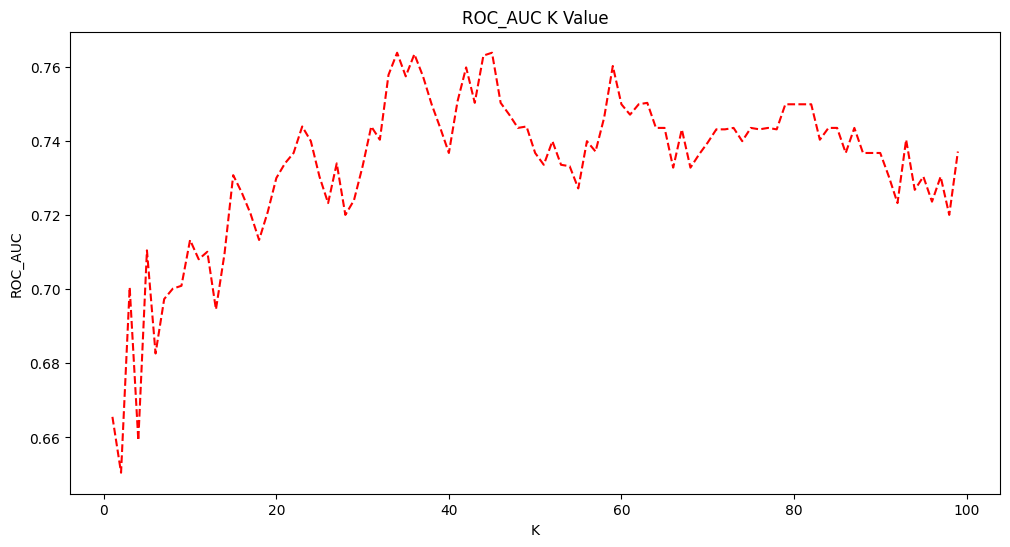

In [ ]:
# Plotting 
y_plt = vv['ROC_AUC']
x_plt = vv['K']
plt.figure(figsize=(12, 6))
plt.plot(x_plt, y_plt, color='red', linestyle='dashed')
plt.title('ROC_AUC K Value')
plt.xlabel('K')
plt.ylabel('ROC_AUC')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing KNN with the best K
knn2 = KNeighborsClassifier(n_neighbors=34)
# Fitting the model
knn2 = knn2.fit(x_train,y_train)

In [ ]:
#@title KNN 2 Evaluation
from sklearn.metrics import classification_report

# Predicting a class / outcome using test data
y_pred2 = knn2.predict(x_test)

# Printing classification report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       157
           1       0.61      0.76      0.67        74

    accuracy                           0.77       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.79      0.77      0.77       231



In [ ]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix
confusion_matrix(y_test, y_pred2)

array([[121,  36],
       [ 18,  56]])

In [ ]:
from sklearn import metrics
# Compute evaluation metrics:

# Accuracy
knn2_accuracy = metrics.accuracy_score(y_test, y_pred2)

# Precision
knn2_precision = metrics.precision_score(y_test, y_pred2)

# Recall
knn2_recall = metrics.recall_score(y_test, y_pred2)

# F1
knn2_f1 = metrics.f1_score(y_test, y_pred2)

print("\nAccuracy: ", knn2_accuracy,
      "\nPrecision: ", knn2_precision,
      "\nRecall: ", knn2_recall,
      "\nF1: ", knn2_f1)


Accuracy:  0.7662337662337663 
Precision:  0.6086956521739131 
Recall:  0.7567567567567568 
F1:  0.674698795180723


In [ ]:
#@title KNN 3 - ACC Hyperparameter tuning
import sklearn
from sklearn.neighbors import KNeighborsClassifier

ttt = {}
ill = []
acc= []

# Looking for the best K value by getting Accuracy for each K ranging from 1 to 100
for  i in range(1,100):  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  ill.append(i)
  acc.append(sklearn.metrics.accuracy_score(y_test,y_pred))
  ttt.update({'K':ill})
  ttt.update({'Accuracy':acc})
 
  vtv = pd.DataFrame(ttt)

vtv_sorted = vtv.sort_values('Accuracy',ascending=False,ignore_index=True)

vtv_sorted.head(10)

,K,Accuracy
0,44,0.774892
1,36,0.770563
2,42,0.770563
3,34,0.766234
4,59,0.766234
5,45,0.766234
6,62,0.761905
7,60,0.761905
8,58,0.761905
9,38,0.761905


Text(0, 0.5, 'Accuracy')

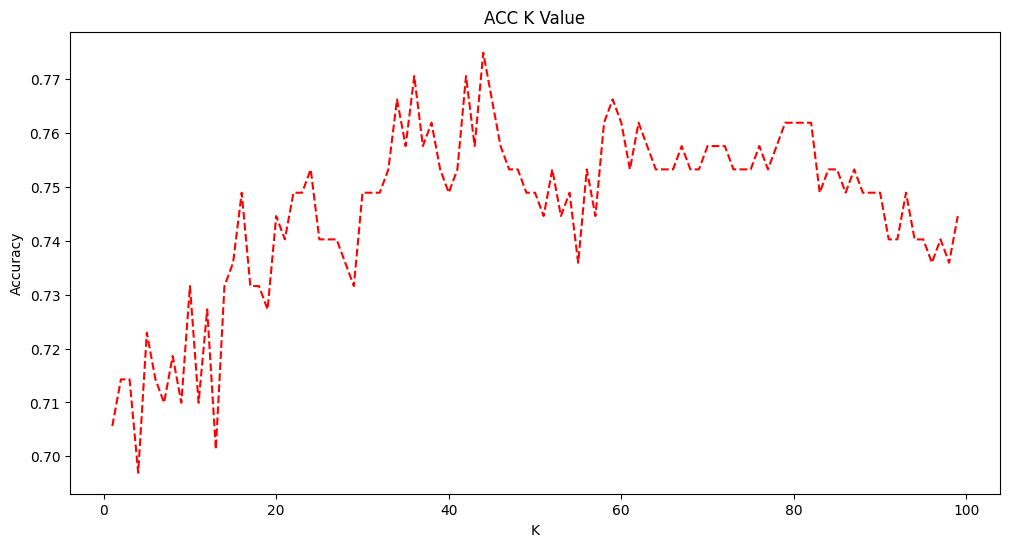

In [ ]:
# Plotting 
y_plt = vtv['Accuracy']
x_plt = vtv['K']
plt.figure(figsize=(12, 6))
plt.plot(x_plt, y_plt, color='red', linestyle='dashed')
plt.title('ACC K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
# Initializing KNN with the best K
knn3 = KNeighborsClassifier(n_neighbors=44)
# Fitting the model
knn3 = knn3.fit(x_train,y_train)

In [ ]:
#@title KNN 3 Evaluation

# Predicting a class / outcome using test data
y_pred3 = knn3.predict(x_test)

In [ ]:
# Calculating confusion matrix
confusion_matrix(y_test, y_pred3)

array([[125,  32],
       [ 20,  54]])

In [ ]:
from sklearn import metrics
# Compute evaluation metrics:

# Accuracy
knn3_accuracy = metrics.accuracy_score(y_test, y_pred3)

# Precision
knn3_precision = metrics.precision_score(y_test, y_pred3)

# Recall
knn3_recall = metrics.recall_score(y_test, y_pred3)

# F1
knn3_f1 = metrics.f1_score(y_test, y_pred3)

print("nAccuracy: ", knn3_accuracy,
      "\nPrecision: ", knn3_precision,
      "\nRecall: ", knn3_recall,
      "\nF1: ", knn3_f1)

nAccuracy:  0.7748917748917749 
Precision:  0.627906976744186 
Recall:  0.7297297297297297 
F1:  0.675


In [ ]:
#@title KNN 4- Selected features

# Selecting important features from a decision tree 1
# Spliting x axis and y axis
y = df['class']
x_selected = df.drop(['pedigre','skin','pressure'],axis=1)

# Splitting train and test data
x_train_selected, x_test_selected, y_train_selected, y_test_selected = train_test_split(x_selected, y, test_size = 0.3, random_state = 0)

x_test.shape,y_test.shape

((231, 8), (231,))

In [ ]:
# Addressing class imbalance

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversampling
over_sampler1 = RandomOverSampler(random_state=42)
x_train_selected, y_train_selected = over_sampler1.fit_resample(x_train_selected, y_train_selected)
print(f"Testing target statistics: {Counter(y_train_selected)}")

Testing target statistics: Counter({1: 343, 0: 343})


In [ ]:
# Initializing KNN with K=10
knn4 = KNeighborsClassifier(n_neighbors=10)


# Fitting the model
knn4 = knn4.fit(x_train_selected, y_train_selected) 

In [ ]:
#@title KNN 4 Evaluation

# Predicting a class / outcome using test data
y_pred4 = knn4.predict(x_test_selected)

# Calculating confusion matrix
confusion_matrix(y_test_selected, y_pred4)

array([[117,  40],
       [ 29,  45]])

In [ ]:
# Accuracy
knn4_accuracy = metrics.accuracy_score(y_test, y_pred4)

# Precision
knn4_precision = metrics.precision_score(y_test, y_pred4)

# Recall
knn4_recall = metrics.recall_score(y_test, y_pred4)

# F1
knn4_f1 = metrics.f1_score(y_test, y_pred4)

print("Accuracy: ", knn4_accuracy,
      "\nPrecision: ", knn4_precision,
      "\nRecall: ", knn4_recall,
      "\nF1: ", knn4_f1)

Accuracy:  0.7012987012987013 
Precision:  0.5294117647058824 
Recall:  0.6081081081081081 
F1:  0.5660377358490566


In [ ]:
#@title Comparison of metrics

df_compare = pd.DataFrame([(knn1_accuracy, knn2_accuracy, knn3_accuracy, knn4_accuracy),
                    (knn1_precision, knn2_precision, knn3_precision, knn4_precision),
                    (knn1_recall, knn2_recall, knn3_recall, knn4_recall),
                    (knn1_f1, knn2_f1, knn3_f1, knn4_f1)],
           columns=('KNN1 (K = 10)', 'KNN2 (K tunned - AUC)', 'KNN3 (K tunned - ACC)', 'KNN4 (selected features, K = 10)'),
           index=('Accuracy', 'Precision', 'Recall', 'F1')
                 )

df_compare.head()

,KNN1 (K = 10),KNN2 (K tunned - AUC),KNN3 (K tunned - ACC),"KNN4 (selected features, K = 10)"
Accuracy,0.731602,0.766234,0.774892,0.701299
Precision,0.569767,0.608696,0.627907,0.529412
Recall,0.662162,0.756757,0.729730,0.608108
F1,0.612500,0.674699,0.675000,0.566038
